In [ ]:
from emrpy.visualization import plot_timeseries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Tuple, Union
from pathlib import Path

In [2]:
# Simulate hourly data with gaps
times = pd.date_range("2025-01-01", periods=200, freq="h")
df = pd.DataFrame({
        "timestamp": times,
        "returns": np.random.randn(200).cumsum()
    })
df

,timestamp,returns
0,2025-01-01 00:00:00,-0.032358
1,2025-01-01 01:00:00,-0.886544
2,2025-01-01 02:00:00,-1.722538
3,2025-01-01 03:00:00,-0.568338
4,2025-01-01 04:00:00,0.371678
...,...,...
195,2025-01-09 03:00:00,-12.275410
196,2025-01-09 04:00:00,-12.540954
197,2025-01-09 05:00:00,-15.141511
198,2025-01-09 06:00:00,-14.779881


In [ ]:
def plot_timeseries(
    df: pd.DataFrame,
    timestamp_col: str = "timestamp",
    value_col: str = "value",
    segment_col: Optional[str] = None,
    segment_value: Optional[str] = None,
    tick_every: int = 10,
    figsize: Tuple[int, int] = (12, 6),
    save_path: Optional[Union[str, Path]] = None,
) -> None:
    """
    Simple time series plot: uses datetime axis directly.
    """
    data = df.copy()
    data[timestamp_col] = pd.to_datetime(data[timestamp_col])

    plt.figure(figsize=figsize)

    if segment_col:
        # decide which segments to plot
        if segment_value is not None:
            segments = [segment_value]
        else:
            segments = data[segment_col].unique()
        # plot each segment
        for seg in segments:
            sub = data[data[segment_col] == seg]
            plt.plot(sub[timestamp_col], sub[value_col], lw=1, label=str(seg))
        plt.legend(title=segment_col)
    else:
        plt.plot(data[timestamp_col], data[value_col], lw=1)

    # labels & ticks
    plt.title(value_col)
    plt.xlabel("Time")
    plt.ylabel(value_col)
    if len(data) > tick_every:
        ticks = data[timestamp_col].iloc[::tick_every]
        plt.xticks(ticks, rotation=45)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
    plt.show()

def plot_gapped_timeseries(
    df: pd.DataFrame,
    timestamp_col: str = "timestamp",
    value_col: str = "value",
    segment_col: Optional[str] = None,
    segment_value: Optional[str] = None,
    tick_every: int = 100,
    figsize: Tuple[int, int] = (12, 6),
    save_path: Optional[Union[str, Path]] = None,
) -> None:
    """
    Gapped time series plot: uses integer bar axis to suppress timestamp gaps.
    """
    data = df.copy()
    if segment_col and segment_value is not None:
        data = data[data[segment_col] == segment_value].copy()
    data[timestamp_col] = pd.to_datetime(data[timestamp_col])
    data = data.sort_values(timestamp_col).reset_index(drop=True)
    data["bar_number"] = range(len(data))

    plt.figure(figsize=figsize)
    plt.plot(data["bar_number"], data[value_col], lw=1)
    title = f"{segment_value} {value_col}" if segment_value else value_col
    plt.title(f"{title} (Gapped)")
    plt.xlabel("Bar Number")
    plt.ylabel(value_col)
    if len(data) > tick_every:
        ticks = data["bar_number"][::tick_every]
        labels = data[timestamp_col].dt.strftime("%Y-%m-%d %H:%M")[::tick_every]
        plt.xticks(ticks, labels, rotation=45)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [20]:
# === Create a regular equally spaced DataFrame ===
times = pd.date_range("2025-01-01", periods=200, freq="h")
df_regular = pd.DataFrame({
    "timestamp": times,
    "value": np.random.randn(200).cumsum(),
    "group": ["A"]*100 + ["B"]*100
})
df_regular

,timestamp,value,group
0,2025-01-01 00:00:00,-0.084711,A
1,2025-01-01 01:00:00,-0.924106,A
2,2025-01-01 02:00:00,-0.845854,A
3,2025-01-01 03:00:00,0.448701,A
4,2025-01-01 04:00:00,-0.088555,A
...,...,...,...
195,2025-01-09 03:00:00,-7.059834,B
196,2025-01-09 04:00:00,-7.183341,B
197,2025-01-09 05:00:00,-8.398018,B
198,2025-01-09 06:00:00,-9.818182,B


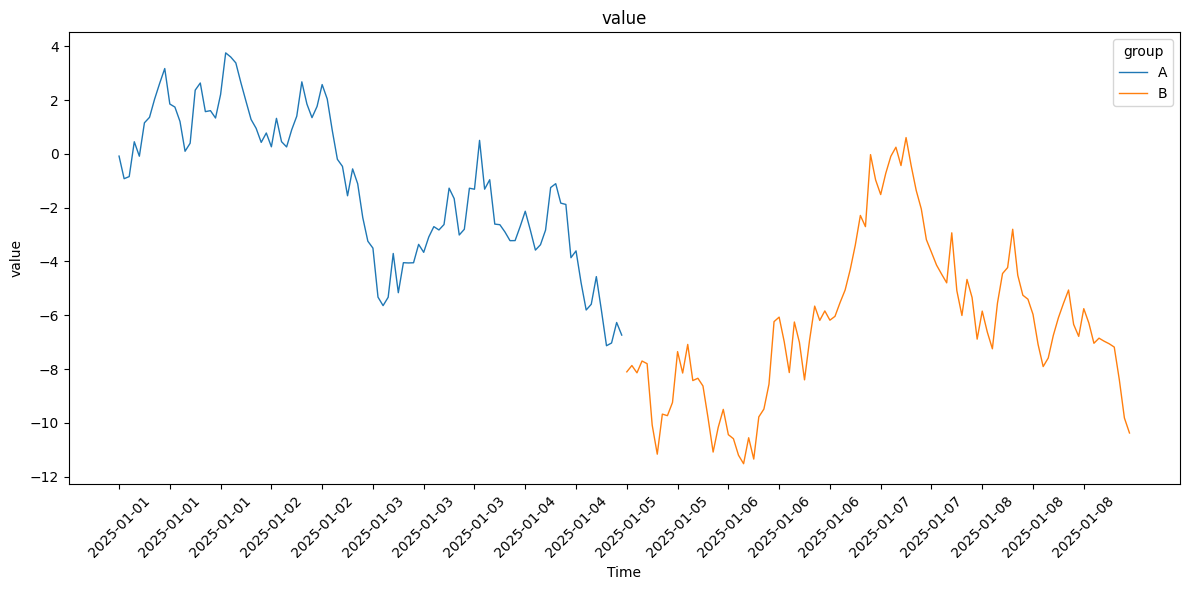

In [23]:
plot_timeseries(df_regular,
                segment_col="group",
                # segment_value="A",
                tick_every=10)

In [ ]:



# === Create a gapped DataFrame (drop weekends) ===
full_times = pd.date_range("2025-01-01", periods=500, freq="H")
gapped_times = full_times[full_times.weekday < 5]
df_gapped = pd.DataFrame({
    "timestamp": gapped_times,
    "value": np.random.randn(len(gapped_times)).cumsum(),
    "asset": ["X"]*len(gapped_times)
})


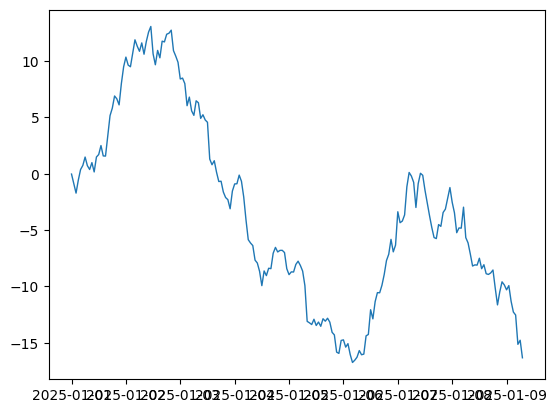

In [6]:
plt.plot(df["timestamp"], df["returns"], lw=1)

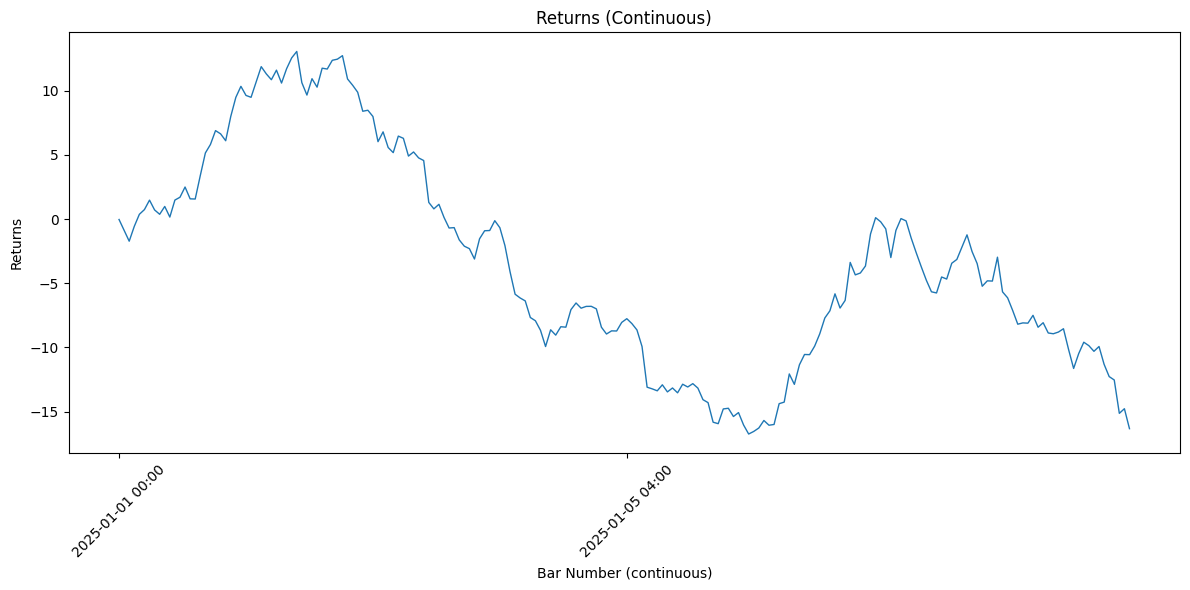

In [5]:
# Basic plot
plot_timeseries(df, timestamp_col="timestamp", value_col="returns")